In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
#Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [24]:
#DataFrame
dates = pd.date_range('20180101', periods = 6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df = pd.DataFrame(np.random.randn(6,4),index = dates, columns=list(['AA','BB','CC','DD']))
df
df.dtypes

AA    float64
BB    float64
CC    float64
DD    float64
dtype: object

In [26]:
df.head()

df.tail()

,AA,BB,CC,DD
2018-01-02,-1.302173,0.487806,-1.193311,-0.355835
2018-01-03,0.020055,-0.455060,-0.179345,0.659352
2018-01-04,-0.480049,-0.251292,1.202144,0.765192
2018-01-05,-0.588123,0.336927,-0.810019,-1.685268
2018-01-06,-0.043920,-0.855373,-1.398048,1.018032


In [27]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [28]:
df.columns

Index(['AA', 'BB', 'CC', 'DD'], dtype='object')

In [29]:
df.values

array([[ 1.07319604e-03,  1.89748330e-01, -3.55351083e-01,
        -2.50830582e-01],
       [-1.30217274e+00,  4.87805810e-01, -1.19331067e+00,
        -3.55835125e-01],
       [ 2.00552030e-02, -4.55060447e-01, -1.79344812e-01,
         6.59351649e-01],
       [-4.80048587e-01, -2.51291604e-01,  1.20214443e+00,
         7.65191507e-01],
       [-5.88123178e-01,  3.36926735e-01, -8.10019137e-01,
        -1.68526846e+00],
       [-4.39202435e-02, -8.55372526e-01, -1.39804818e+00,
         1.01803247e+00]])

In [42]:
df.describe()

,AA,BB,CC,DD
count,6.000000,6.000000,6.000000,6.000000
mean,-3.999681,0.899809,-3.961787,-0.576346
std,3.421249,0.398410,2.754375,0.368265
min,-9.084516,0.189748,-8.227692,-0.857496
25%,-6.104076,0.833238,-5.159793,-0.841946
50%,-3.461617,0.964150,-3.894950,-0.754246
75%,-1.620287,1.082597,-2.336014,-0.364044
max,0.001073,1.369127,-0.355351,0.013067


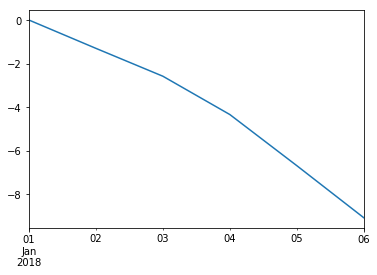

In [43]:
df.AA.plot()

In [44]:
df.to_csv('foo.csv')

In [46]:
df = pd.read_csv('pivot.csv')
df

,date,CODE,CODE1,CODE2,CODE3,CODE4
0,2018-01-01,3,4,5,6,7
1,2018-01-02,5,6,7,8,9
2,2018-01-03,8,9,10,11,12
3,2018-01-04,3,4,5,6,7
4,2018-01-05,7,8,9,10,11
5,2018-01-06,4,5,6,7,8
6,2018-01-01,4,5,6,7,8
7,2018-01-02,5,6,7,8,9
8,2018-01-03,6,7,8,9,10
9,2018-01-04,7,8,9,10,11


In [52]:
df.groupby('date').sum()

,CODE,CODE1,CODE2,CODE3,CODE4
date,,,,,
2018-01-01,7,9,11,13,15
2018-01-02,10,12,14,16,18
2018-01-03,14,16,18,20,22
2018-01-04,10,12,14,16,18
2018-01-05,14,16,18,20,22
2018-01-06,10,12,14,16,18


In [54]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
CODE              int64
CODE1             int64
CODE2             int64
CODE3             int64
CODE4             int64
dtype: object

In [60]:
df['year']=df['date'].map(lambda x:x.year)
df.groupby('year').sum()

,CODE,CODE1,CODE2,CODE3,CODE4
year,,,,,
2018,65,77,89,101,113


In [64]:
df.query('CODE>4')

,date,CODE,CODE1,CODE2,CODE3,CODE4,year
1,2018-01-02,5,6,7,8,9,2018
2,2018-01-03,8,9,10,11,12,2018
4,2018-01-05,7,8,9,10,11,2018
7,2018-01-02,5,6,7,8,9,2018
8,2018-01-03,6,7,8,9,10,2018
9,2018-01-04,7,8,9,10,11,2018
10,2018-01-05,7,8,9,10,11,2018
11,2018-01-06,6,7,8,9,10,2018


In [75]:
df2 = pd.DataFrame(np.random.randn(6,4), columns=list(['AA','BB','CC','DD']))
df2.insert(0,'date',dates)
df2

,date,AA,BB,CC,DD
0,2018-01-01,-0.485826,1.083369,0.750120,-1.145033
1,2018-01-02,2.730080,-0.651084,-0.410267,-0.927193
2,2018-01-03,-1.633382,-0.338814,0.844633,0.048973
3,2018-01-04,-1.208025,0.716561,1.552182,-0.281470
4,2018-01-05,-0.359231,0.392472,-1.787787,0.063295
5,2018-01-06,0.056314,-1.427014,0.424083,-1.617287


In [70]:
pd.merge(df,df2,on='date')

,date,CODE,CODE1,CODE2,CODE3,CODE4,year,AA,BB,CC,DD
0,2018-01-01,3,4,5,6,7,2018,-1.729018,0.295547,-0.902650,-0.916006
1,2018-01-01,4,5,6,7,8,2018,-1.729018,0.295547,-0.902650,-0.916006
2,2018-01-02,5,6,7,8,9,2018,2.395211,0.369598,1.569454,1.768889
3,2018-01-02,5,6,7,8,9,2018,2.395211,0.369598,1.569454,1.768889
4,2018-01-03,8,9,10,11,12,2018,-2.384607,0.301681,1.295239,-1.063305
5,2018-01-03,6,7,8,9,10,2018,-2.384607,0.301681,1.295239,-1.063305
6,2018-01-04,3,4,5,6,7,2018,-0.174658,0.387975,0.737810,0.232853
7,2018-01-04,7,8,9,10,11,2018,-0.174658,0.387975,0.737810,0.232853
8,2018-01-05,7,8,9,10,11,2018,1.013914,0.015925,-0.492669,0.791317
9,2018-01-05,7,8,9,10,11,2018,1.013914,0.015925,-0.492669,0.791317
